Found 1704 images belonging to 2 classes.
Found 4232 images belonging to 2 classes.
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.5884 - loss: 4.7737 - val_accuracy: 0.8759 - val_loss: 0.3341
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 17618s 332s/step - accuracy: 0.8796 - loss: 0.3327 - val_accuracy: 0.9048 - val_loss: 0.2467
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21832s 412s/step - accuracy: 0.9150 - loss: 0.2237 - val_accuracy: 0.9298 - val_loss: 0.2225
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 313s 6s/step - accuracy: 0.9484 - loss: 0.1511 - val_accuracy: 0.9355 - val_loss: 0.1959
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 324s 6s/step - accuracy: 0.9627 - loss: 0.1050 - val_accuracy: 0.9286 - val_loss: 0.2922
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 332s 6s/step - accuracy: 0.9904 - loss: 0.0415 - val_accuracy: 0.9409 - val_loss: 0.1742
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - accuracy: 0.9853 - loss: 0.0390 - val_accuracy: 0.9471 - val_loss: 0.2456
Epoch 8/10
54/54 ━━

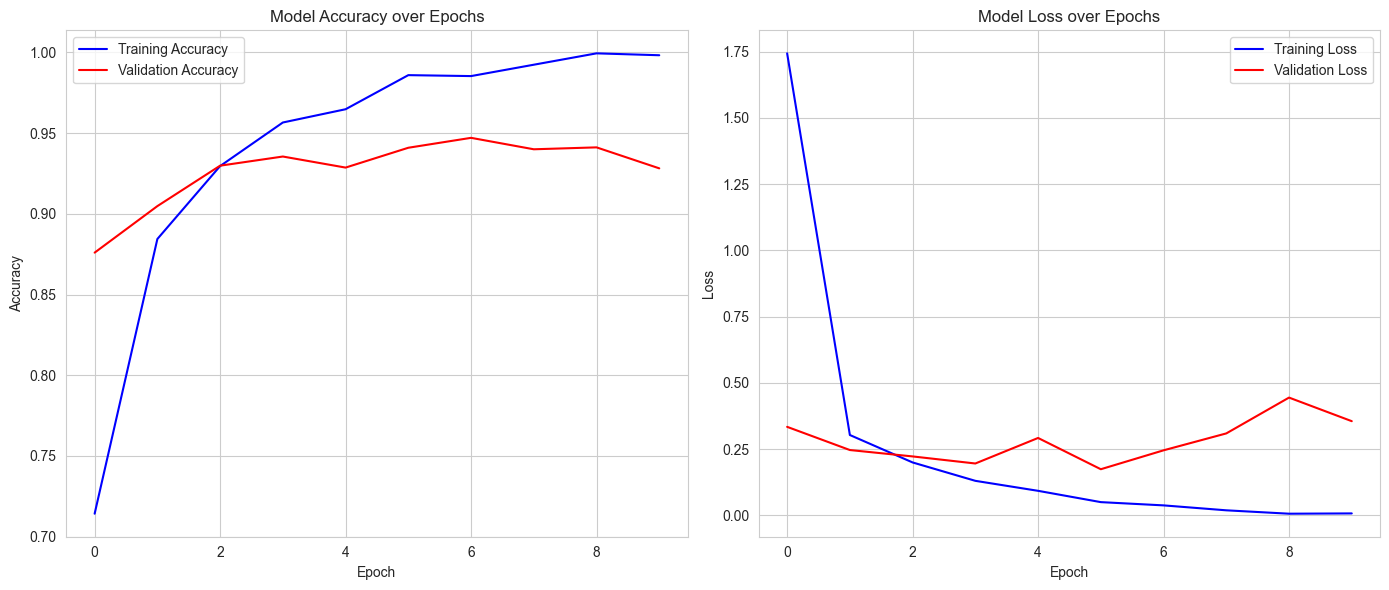

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

IMG_HEIGHT = 480
IMG_WIDTH = 640

model = models.Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,)

train_generator = train_datagen.flow_from_directory(
    directory='dataset/training',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
)

valid_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = valid_datagen.flow_from_directory(
    directory='dataset/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')


def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    return img


new_image = preprocess_image('dataset/sample.jpg')
predictions = model.predict(np.expand_dims(new_image, axis=0))
predicted_class = np.argmax(predictions, axis=1)

if predicted_class == 0:
    print('Eyes are closed')
else:
    print('Eyes are open')

sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy', color='red')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(frameon=True)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(frameon=True)
plt.grid(True)

plt.tight_layout()
plt.show()
